## 분석1 : 선형회귀(LinearRegression)
###### 유기동물 데이터를 이용하여 선형회기분석

In [68]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

### 1. Data Loading

In [2]:
df1=pd.read_csv("D:\project_imsi\lostAnimal_20180101_20181231_vol3.csv", encoding="euc-kr")
#df2=pd.read_csv("D:\project_imsi\lostAnimal_20170101_20171231_vol3.csv", encoding="euc-kr")
#df3=pd.read_csv("D:\project_imsi\lostAnimal_20160101_20161231_vol3.csv", encoding="euc-kr")
#df4=pd.read_csv("D:\project_imsi\lostAnimal_20150101_20151231_vol3.csv", encoding="euc-kr")


In [3]:
df1.tail(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(before),age(after),careAddr,careNm,careTel,chargeNm,colorCd,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
80329,80329,80329,80347,2015(년생),3,대구광역시 수성구 달구벌대로 2475 (범어동),제니스동물병원,053-756-8290,경제환경과,흰색,...,False,True,False,False,False,True,False,False,False,False


In [4]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'age(before)',
       'age(after)', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeComment', 'noticeEdt', 'noticeNo', 'noticeSdt',
       'officetel', 'orgNm', 'popfile', 'processState', 'sexCd', 'specialMark',
       'weight(before)', 'weight(after)', 'kind', 'breed', 'breed_Pre',
       'happenWd', 'happenMth', 'size', 'age_u', 'processState_Pre',
       'processState_C', 'processState_A', 'processState_D', 'processState_R',
       'processState_E', 'sexCd_M', 'sexCd_F', 'sexCd_Q', 'neuterYn_Y',
       'neuterYn_N', 'neuterYn_U', 'careNm_ETC', 'careNm_H', 'careNm_C',
       'careNm_O', 'careNm_AD', 'careNm_CM'],
      dtype='object')

### 2. Data PreProcessing

#### 1) 필요없는 컬럼 삭제

In [5]:
df = df1.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'neuterYn','age(before)',
                  'age(after)','colorCd', 'careAddr', 'careNm', 'careTel','popfile','chargeNm',
                  'desertionNo', 'filename','happenDt', 'happenPlace','kindCd','breed',
                  'weight(before)', 'weight(after)', 'orgNm','processState','sexCd','processState_Pre',
                 'noticeComment', 'noticeEdt', 'noticeNo', 'noticeSdt','specialMark',
                 'officetel'])
df.head(3)

,kind,breed_Pre,happenWd,happenMth,size,age_u,processState_C,processState_A,processState_D,processState_R,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
0,0,믹스견,Thursday,9,소형,유견기,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,0,믹스견,Thursday,9,소형,유견기,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,0,믹스견,Thursday,9,초소형,유견기,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [6]:
df.columns

Index(['kind', 'breed_Pre', 'happenWd', 'happenMth', 'size', 'age_u',
       'processState_C', 'processState_A', 'processState_D', 'processState_R',
       'processState_E', 'sexCd_M', 'sexCd_F', 'sexCd_Q', 'neuterYn_Y',
       'neuterYn_N', 'neuterYn_U', 'careNm_ETC', 'careNm_H', 'careNm_C',
       'careNm_O', 'careNm_AD', 'careNm_CM'],
      dtype='object')

#### 2) 데이터 mapping : size

In [7]:
df['size'].fillna('중형',inplace=True)
size_mapping = {"대형":0,"소형":1,"중형":2,"초소형":3}
df['size'] = df['size'].map(size_mapping)

df.head(3)

,kind,breed_Pre,happenWd,happenMth,size,age_u,processState_C,processState_A,processState_D,processState_R,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
0,0,믹스견,Thursday,9,1,유견기,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,0,믹스견,Thursday,9,1,유견기,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,0,믹스견,Thursday,9,3,유견기,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


#### 3) 데이터 mapping : age

In [8]:
age_mapping = {"노견기":0,"성견기":1,"유견기":2}
df['age_u'] = df['age_u'].map(age_mapping)

df.head(2)

,kind,breed_Pre,happenWd,happenMth,size,age_u,processState_C,processState_A,processState_D,processState_R,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
0,0,믹스견,Thursday,9,1,2,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,0,믹스견,Thursday,9,1,2,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


#### 4) 데이터 mapping : week

In [9]:
week_mapping = {"Monday":0, "Tuesday":2, "Wednesday":3, 
                "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['happenWd'] = df['happenWd'].map(week_mapping)
df.tail(3)

,kind,breed_Pre,happenWd,happenMth,size,age_u,processState_C,processState_A,processState_D,processState_R,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
80327,0,믹스견,0,1,3,0,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
80328,0,믹스견,0,1,1,1,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
80329,0,믹스견,0,1,1,1,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


#### 5) 데이터 mapping : breed

In [55]:
df['breed_Pre'].fillna('믹스견',inplace=True)

In [56]:
breed_mapping = {"믹스견":0,
"말티즈":1,
"알라스칸 말라뮤트":2,
"고양이":3,
"그레이트 피레니즈":4,
"푸들":5,
"진도견":6,
"시츄":7,
"한국 고양이":8,
"시베리안 허스키":9,
"리트리버":10,
"슈나우져":11,
"미니어쳐 핀셔":12,
"핏불테리어":13,
"코카 스파니엘":14,
"비글":15,
"사모예드":16,
"요크셔 테리어":17,
"페키니즈":18,
"기니피그":19,
"삽살개":20,
"포메라니안":21,
"치와와":22,
"스피츠":23,
"닥스훈트":24,
"포인터":25,
"보더 콜리":26,
"닭":27,
"고슴도치":28,
"돼지":29,
"레이크랜드 테리어":30,
"보스턴 테리어":31,
"도사":32,
"젖소":33,
"퍼그":34,
"토끼":35,
"올드 잉글리쉬 불독":36,
"말라뮤트":37,
"아키다":38,
"셔틀랜드 쉽독":39,
"기타":40,
"도마뱀":41,
"마리노이즈":42,
"병아리":43,
"올드 잉글리쉬 쉽독":44,
"앵무새":45,
"셰퍼드":46,
"콜리":47,
"샤페이":48,
"그레이 하운드":49,
"불독":50,
"저먼포인터":51,
"브리타니":52,
"프렌치 불독":53,
"롯트와일러":54,
"시바":55,
"웰시 코기 펨브로크":56,
"불 테리어":57,
"기니픽":58,
"라이카":59,
"비숑 프리제":60,
"스코티쉬 테리어":61,
"사냥 믹스견":62,
"차우차우":63,
"킹 찰스 스파니엘":64,
"사슴":65,
"베들링턴 테리어":66,
"햄스터":67,
"염소":68,
"도베르만":69,
"세터":70,
"페르시안-페프시안 친칠라":71,
"거위":72,
"패릿":73,
"폭스테리어":74,
"세타":75,
"애완용토끼":76,
"애완용 닭":77,
"풍산견":78,
"친칠라":79,
"그레이트 덴":80,
"흑염소":81,
"웰시 코기":82,
"벨지안 쉽독":83,
"제페니즈칭":84,
"잭 러셀 테리어":85,
"케인 코르소":86,
"빠삐용":87,
"하운드":88,
"암탉":89,
"불랙턴 푸들":90,
"기나아피그":91,
"블랙탄":92,
"오리":93,
"아메리칸스테포드셔테리어":94,
"브리티니 스파니엘":95,
}

df['breed_Pre'] = df['breed_Pre'].map(breed_mapping)
df.head(3)

,kind,breed_Pre,happenWd,happenMth,size,age_u,processState_C,processState_A,processState_D,processState_R,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
0,0,0,4,9,1,2,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,0,0,4,9,1,2,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,0,0,4,9,3,2,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


### 3. Data Statistical Analysis

In [39]:
df.describe()

,kind,breed_Pre,happenWd,happenMth,size,age_u
count,80330.000000,80330.0,80330.000000,80330.000000,80330.000000,80330.000000
mean,0.252820,0.0,3.115250,4.984402,2.048014,1.551674
std,0.456753,0.0,2.136904,2.246445,0.952296,0.550096
min,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.0,2.000000,3.000000,1.000000,1.000000
50%,0.000000,0.0,3.000000,5.000000,2.000000,2.000000
75%,0.000000,0.0,5.000000,7.000000,3.000000,2.000000
max,2.000000,0.0,7.000000,9.000000,3.000000,2.000000


In [63]:
np.round(df.corr(),3)

,kind,breed_Pre,happenWd,happenMth,size,age_u,processState_C,processState_A,processState_D,processState_R,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
kind,1.000,NaN,0.012,0.127,0.392,0.300,-0.043,0.014,0.122,-0.176,...,0.404,-0.083,0.015,0.023,-0.065,0.074,-0.099,-0.009,0.045,0.060
breed_Pre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
happenWd,0.012,NaN,1.000,0.010,-0.008,-0.026,-0.015,-0.003,-0.014,0.041,...,-0.008,0.010,-0.034,0.031,-0.006,-0.013,0.004,-0.016,0.023,0.006
happenMth,0.127,NaN,0.010,1.000,0.077,0.039,0.354,-0.145,-0.142,-0.011,...,0.071,0.001,0.002,-0.003,-0.011,0.009,-0.011,0.002,0.014,0.003
size,0.392,NaN,-0.008,0.077,1.000,0.386,-0.016,0.049,0.091,-0.179,...,0.200,-0.144,0.061,0.005,-0.013,0.018,-0.009,-0.012,-0.006,0.001
age_u,0.300,NaN,-0.026,0.039,0.386,1.000,0.028,0.070,0.089,-0.258,...,0.161,-0.187,0.177,-0.095,-0.004,0.020,0.032,-0.005,-0.057,-0.039
processState_C,-0.043,NaN,-0.015,0.354,-0.016,0.028,1.000,-0.297,-0.394,-0.187,...,0.024,-0.036,-0.021,0.038,0.076,-0.060,0.061,0.007,-0.041,-0.034
processState_A,0.014,NaN,-0.003,-0.145,0.049,0.070,-0.297,1.000,-0.501,-0.237,...,-0.035,0.011,0.046,-0.053,-0.032,0.136,-0.061,0.007,-0.007,-0.065
processState_D,0.122,NaN,-0.014,-0.142,0.091,0.089,-0.394,-0.501,1.000,-0.316,...,0.069,-0.094,0.045,-0.002,-0.008,-0.082,0.021,-0.012,0.016,0.072
processState_R,-0.176,NaN,0.041,-0.011,-0.179,-0.258,-0.187,-0.237,-0.316,1.000,...,-0.087,0.163,-0.104,0.031,-0.031,0.006,-0.020,-0.000,0.034,0.022


### 4. Data Learning

In [78]:
feature_name = ['kind', 'breed_Pre', 'happenWd', 'happenMth', 'size', 'age_u',
       'processState_C','processState_D', 'processState_R',
       'processState_E', 'sexCd_M', 'sexCd_F', 'sexCd_Q', 'neuterYn_Y',
       'neuterYn_N', 'neuterYn_U', 'careNm_ETC', 'careNm_H', 'careNm_C',
       'careNm_O', 'careNm_AD', 'careNm_CM']

X = df[feature_name].as_matrix()
X = preprocessing.scale(x_train)
X

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


array([[-0.55351865,  0.        ,  0.41403635, ..., -0.03117593,
        -0.17710436, -0.44057633],
       [-0.55351865,  0.        ,  0.41403635, ..., -0.03117593,
        -0.17710436, -0.44057633],
       [-0.55351865,  0.        ,  0.41403635, ..., -0.03117593,
        -0.17710436, -0.44057633],
       ...,
       [-0.55351865,  0.        , -1.45784229, ..., -0.03117593,
        -0.17710436, -0.44057633],
       [-0.55351865,  0.        , -1.45784229, ..., -0.03117593,
        -0.17710436, -0.44057633],
       [-0.55351865,  0.        , -1.45784229, ..., -0.03117593,
        -0.17710436, -0.44057633]])

In [158]:
label_name = "processState_A"
Y = np.array(list(df[label_name]))
Y = Y.reshape(-1,1)
Y
#Y = np.array(list(df[label_name]))
#df.loc[:,(header =='NAME') | (header == 'GENDER')]


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [159]:
lm = LinearRegression()

In [160]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
lm.coef_

array([[ 1.66157641e-14,  2.12460927e-02, -3.13000743e-15,
         1.35252676e-16, -1.31100314e-17, -3.73484125e-17,
        -3.91633464e-01, -4.89854703e-01, -3.36386961e-01,
        -8.43742085e-02, -1.19763672e+00, -1.19078906e+00,
        -6.22019844e-01,  9.07847137e-01,  1.99119745e+00,
         1.92695482e+00, -2.99896775e+00, -6.24849908e+00,
        -6.76973396e+00, -4.23635131e-01, -2.33566717e+00,
        -5.01848045e+00]])

In [165]:
#df2 = np.transpose(pd.DataFrame(lm.coef_))
#df2.columns = feature_name
df2 = pd.DataFrame(lm.coef_, columns= feature_name)
df2

,kind,breed_Pre,happenWd,happenMth,size,age_u,processState_C,processState_D,processState_R,processState_E,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
0,1.661576e-14,0.021246,-3.130007e-15,1.352527e-16,-1.311003e-17,-3.734841e-17,-0.391633,-0.489855,-0.336387,-0.084374,...,-0.62202,0.907847,1.991197,1.926955,-2.998968,-6.248499,-6.769734,-0.423635,-2.335667,-5.01848


In [166]:
lm.intercept_

array([0.27380804])

In [167]:
type(Y)

numpy.ndarray

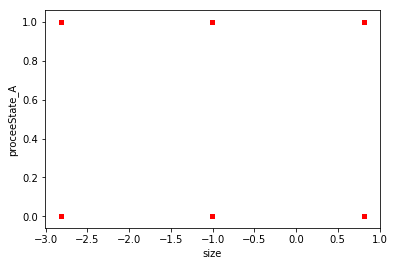

In [172]:
plt.scatter(X[:,5],Y[:,0],c = 'r',s=15,alpha=0.5)
plt.xlabel('size')
plt.ylabel('proceeState_A')
plt.show()

In [169]:
Y_pred = lm.predict(X)

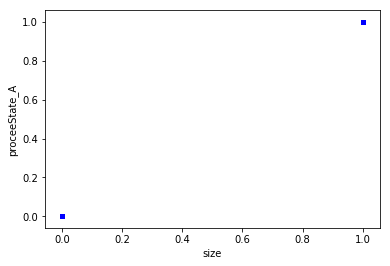

In [171]:
plt.scatter(Y[:,0],Y_pred,c = 'blue', s=15, alpha=0.5)
plt.xlabel('')
plt.ylabel('proceeState_A')
plt.show()